60


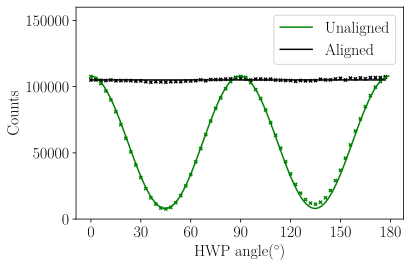

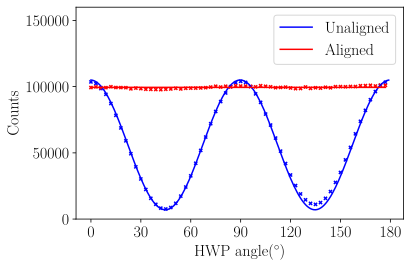

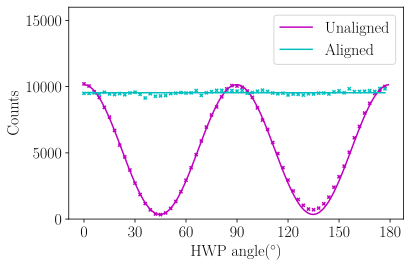

In [1]:
%reset -f
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# for vector graphics instead of pngs
%config InlineBackend.figure_format = 'svg'

# For tex fonts and math-mode in figures
plt.rcParams['text.latex.preamble']=r'\usepackage{lmodern}'
params = {'text.usetex':True,'font.size':16,'font.family':
'serif','figure.autolayout': True}
plt.rcParams.update(params)


unaligned_data_Q1= np.loadtxt('unaligned_data.txt',dtype=float) #_importing file_


detectorA=unaligned_data_Q1[:,0]
detectorB=unaligned_data_Q1[:,1]
AB_counts_unfiltered=unaligned_data_Q1[:,4]

detectorA=detectorA[3:63]
detectorB=detectorB[3:63]
AB_counts_unfiltered=AB_counts_unfiltered[3:63]

j=np.size(detectorA)

print(j)

timearray = list()  #_making a timearray to use as the x-axis of the graph_
for i in range(j):
    timearray.append(i*3)
    
t=20*0.000000001
accidental_counts=detectorA*detectorB*2*t #subtraction of accidental counts
    

AB_counts = AB_counts_unfiltered - accidental_counts



aligned_data_Q1= np.loadtxt('aligned_data.txt',dtype=float) #_importing file_

detectorA_aligned=aligned_data_Q1[:,0]
detectorB_aligned=aligned_data_Q1[:,1]

AB_counts_unfiltered_aligned=aligned_data_Q1[:,4]

detectorA_aligned=detectorA_aligned[3:63]
detectorB_aligned=detectorB_aligned[3:63]
AB_counts_unfiltered_aligned=AB_counts_unfiltered_aligned[3:63]


accidental_counts_aligned=detectorA_aligned*detectorB_aligned*2*t
    

AB_counts_aligned = AB_counts_unfiltered_aligned - accidental_counts_aligned

detectorA_aligned_fit = [sum(detectorA_aligned)/len(detectorA_aligned)] * len(timearray)
detectorA_fit = np.ones(180)
x = np.ones(180)

for i in range(180):
    x[i] = i

for i in range(180):
    detectorA_fit[i] = 50000*np.cos(4*(i+1)*np.pi/180-0.05) + 58000
        
plt.figure


plt.plot(x,detectorA_fit,"g",label='Unaligned')
plt.plot(timearray,detectorA_aligned_fit,"k",label='Aligned')
plt.scatter(timearray,detectorA, s=10, c="g", marker="x")
plt.scatter(timearray,detectorA_aligned, s=10, c="k", marker="x")
plt.ylim(0, 160000)
plt.legend(loc="best")
plt.legend()
plt.ylabel('Counts')
plt.xlabel("HWP angle($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig('detectorA_align.png')
plt.show()
plt.close()

detectorB_aligned_fit = [sum(detectorB_aligned)/len(detectorB_aligned)] * len(timearray)
detectorB_fit = np.ones(180)

for i in range(180):
    detectorB_fit[i] = 49000*np.cos(4*(i+1)*np.pi/180-0.05) + 56000

plt.figure

plt.plot(x,detectorB_fit,"b",label='Unaligned')
plt.plot(timearray,detectorB_aligned_fit,"r",label='Aligned')
plt.scatter(timearray,detectorB, s=10, c="b", marker="x")
plt.scatter(timearray,detectorB_aligned, s=10, c="r", marker="x")
plt.ylim(0, 160000)
plt.legend(loc="best")
plt.ylabel('Counts')
plt.xlabel("HWP angle($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig('detectorB_align.png')
plt.show()
plt.close()

detectorAB_aligned_fit = [sum(AB_counts_aligned)/len(AB_counts_aligned)] * len(timearray)
detectorAB_fit = np.ones(180)

for i in range(180):
    detectorAB_fit[i] = 4900*np.cos(4*(i+1)*np.pi/180-0.05) + 5250

plt.figure

plt.plot(x,detectorAB_fit,"m",label='Unaligned')
plt.plot(timearray,detectorAB_aligned_fit,"c",label='Aligned')
plt.scatter(timearray,AB_counts, s=10, c="m", marker="x")
plt.scatter(timearray,AB_counts_aligned,s=10, c="c", marker="x")
plt.ylim(0, 16000)
plt.legend(loc="best")
plt.ylabel('Counts')
plt.xlabel("HWP angle($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig('detectorAB_Align.png')
plt.show()
plt.close()
    




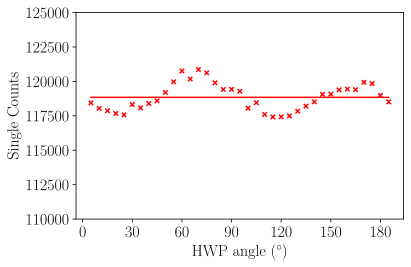

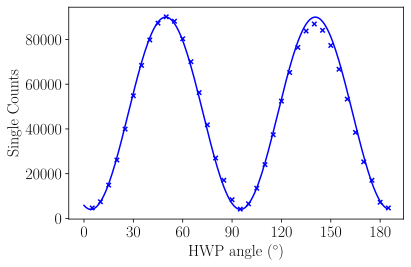

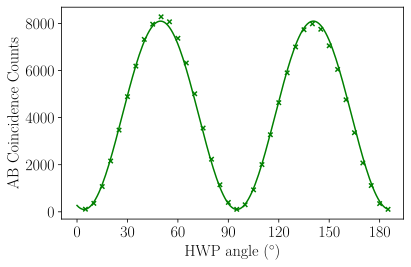

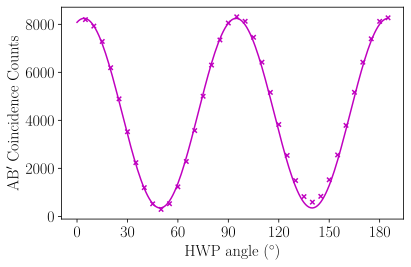

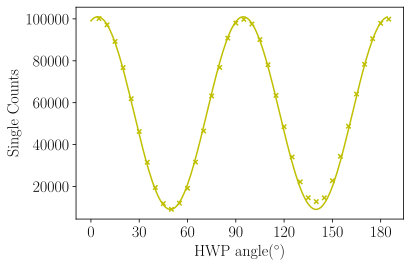

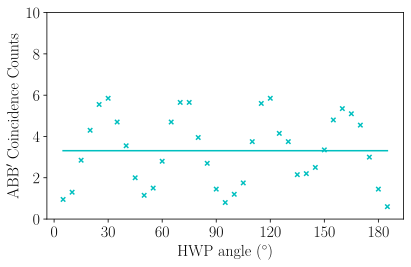

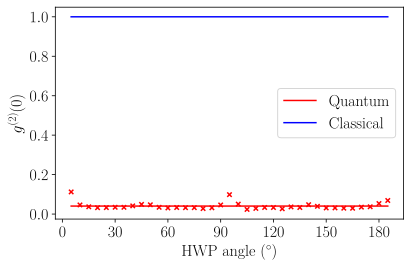

In [2]:
%reset -f
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# for vector graphics instead of pngs
%config InlineBackend.figure_format = 'svg'

# For tex fonts and math-mode in figures
plt.rcParams['text.latex.preamble']=r'\usepackage{lmodern}'
params = {'text.usetex':True,'font.size':16,'font.family':
'serif','figure.autolayout': True}
plt.rcParams.update(params)


filenames =['data0.txt', 'data1.txt', 'data2.txt', 'data3.txt', 'data4.txt', 'data5.txt',
            'data6.txt', 'data7.txt', 'data8.txt', 'data9.txt', 'data10.txt', 'data11.txt',
            'data12.txt', 'data13.txt', 'data14.txt', 'data15.txt', 'data16.txt', 'data17.txt',
            'data18.txt', 'data19.txt', 'data20.txt', 'data21.txt', 'data22.txt', 'data23.txt',
            'data24.txt', 'data25.txt', 'data26.txt', 'data27.txt', 'data28.txt', 'data29.txt', 
            'data30.txt', 'data31.txt', 'data32.txt', 'data33.txt', 'data34.txt', 'data35.txt','data36.txt']

averageA=list()
averageB=list()
averageBprime=list()
averageAB=list()
averageABprime=list()
averageABBprime=list()
g_factor=list()
accidental_g_factor=list()
classical_g_factor=list()

classicalg_denominator=list()
classicalg_numerator=list()
classical_iterator=list()


loaded_file = list()
loaded_file1 = list()
mean_classical_g = list()
mean_g_factor=list()
angleArray = list()


for filename in filenames:
    loaded_file=np.loadtxt(filename)
    
    averages_all_cols=np.mean(loaded_file,axis=0)
    
    averageA.append(averages_all_cols[0])
    averageB.append(averages_all_cols[1])
    averageBprime.append(averages_all_cols[2])
    averageAB.append(averages_all_cols[4])
    averageABprime.append(averages_all_cols[5])
    averageABBprime.append(averages_all_cols[8])
    
    
    
    
#for filename in filenames:                     #classical view g factor
#    loaded_file1=np.loadtxt(filename)

            
  #  arrayAB = []
 #   arrayABprime = []
   # arrayAB.append(loaded_file1[:,4])
    
   # arrayABprime.append(loaded_file1[:,5])
    #for i in range (len(arrayAB)):
     #   classical_iterator.append((arrayAB[i]*arrayABprime[i]))
    #classicalg_denominator.append(np.mean(classical_iterator))
    #classicalg_numerator.append(np.mean(arrayAB)*np.mean(arrayABprime))
    






for i in range(37):
    angleArray.append(5*(i+1))
    
    
    
for i in range(len(averageA)):   #finding quantum view g factor
    g_factor.append((averageA[i] * averageABBprime[i])/(averageAB[i]*averageABprime[i]))
    accidental_g_factor.append(averageA[i]*0.000000002*((averageBprime[i]/averageABprime[i])+(averageB[i]/averageAB[i])))

    



for i in range(len(g_factor)):
    g_factor[i]=g_factor[i]-accidental_g_factor[i] 
   

  
mean_g_factor = [np.mean(g_factor)]*37

###########################################  

averageA_fit = np.ones(len(angleArray))
for i in range(len(angleArray)):
    averageA_fit[i] = np.mean(averageA)
        
plt.figure

plt.plot(angleArray,averageA_fit,"r")
plt.scatter(angleArray,averageA,s=20,c="r",marker="x")
plt.ylim(110000,125000)
plt.ylabel('Single Counts')
plt.xlabel("HWP angle ($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig("DetectorA.png")
plt.show()
plt.close()

averageB_fit = np.ones(185)
x = np.ones(185)

for i in range(185):
    x[i] = i

for i in range(185):
    averageB_fit[i] = -43000*np.cos(3.96*(i+1)*np.pi/180-0.36) + 47000  
    
plt.figure

plt.plot(x,averageB_fit,"b")
plt.scatter(angleArray,averageB,s=20,c="b",marker="x")
plt.ylabel('Single Counts')
plt.xlabel("HWP angle ($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig('DetectorB.png')
plt.show()
plt.close()

averageAB_fit = np.ones(185)

for i in range(185):
    averageAB_fit[i] = -4000*np.cos(3.96*(i+1)*np.pi/180-0.36) + 4100  
    
plt.figure

plt.plot(x,averageAB_fit,"g")
plt.scatter(angleArray,averageAB,s=20,c="g",marker="x")
plt.ylabel('AB Coincidence Counts')
plt.xlabel("HWP angle ($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig('DetectorAB.png')
plt.show()
plt.close()
    
averageABprime_fit = np.ones(185)

for i in range(185):
    averageABprime_fit[i] = 3950*np.cos(3.98*(i+1)*np.pi/180-0.36) + 4300 
    
plt.figure
plt.plot(x,averageABprime_fit,"m")
plt.scatter(angleArray,averageABprime,s=20,c="m",marker="x")
plt.ylabel('AB$\'$ Coincidence Counts')
plt.xlabel("HWP angle ($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig("DetectorABprime.png")
plt.show()
plt.close()

averageBprime_fit = np.ones(185)

for i in range(185):
    averageBprime_fit[i] = 46000*np.cos(3.98*(i+1)*np.pi/180-0.36) + 55000
    
plt.figure

plt.plot(x,averageBprime_fit,"y")
plt.scatter(angleArray,averageBprime,s=20, c="y", marker="x")
plt.ylabel('Single Counts')
plt.xlabel("HWP angle($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig("DetectorBprime.png")
plt.show()
plt.close()
    
averageABBprime_fit = np.ones(len(angleArray))
for i in range(len(angleArray)):
    averageABBprime_fit[i] = np.mean(averageABBprime)
    
plt.figure

plt.plot(angleArray,averageABBprime_fit,"c")
plt.scatter(angleArray,averageABBprime, s=20,c="c", marker="x")
plt.ylim(0,10)
plt.ylabel('ABB$\'$ Coincidence Counts')
plt.xlabel("HWP angle ($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig("DetectorABBprime.png")
plt.show()
plt.close()
    
y=np.ones(len(angleArray))
    
plt.figure

plt.plot(angleArray,mean_g_factor,"r",label="Quantum")
plt.scatter(angleArray,g_factor, s=20, c="r", marker="x")
plt.plot(angleArray,y,"b",label="Classical")
#plt.plot(angleArray,mean_classical_g,"b")
#plt.scatter(angleArray,classical_g_factor,36,"b")
plt.legend(loc="best")
plt.ylabel('$g^{(2)}(0)$')
plt.xlabel("HWP angle ($^\circ$)")
plt.xticks(np.arange(0, 181, 30.0))
plt.savefig("Thegfactors.png")
plt.show()
plt.close()
